# Convoluntional Neural Networks

<div style="display: flex; align-items: center;">
    <img src="../imgs/CNN.jpg" alt="Your Image" width="600" style="margin-right: 20px;">
    <div>
        <p>Convolutional Neural Networks are deep learning models or multi-layer perceptrons similar to artificial neural networks, commonly used to analyze visual images. The founder of convolutional neural networks is renowned computer scientist Yann LeCun. He was the first person to solve handwritten digit problems using convolutional neural networks on the MNIST dataset.</p>
        <p>The architecture of convolutional neural networks is very similar to that of conventional artificial neural networks, especially in the last layer of the network, which is fully connected. Furthermore, it is noted that convolutional neural networks can accept multiple feature maps as inputs rather than vectors.</p>
    </div>
</div>

A convolutional neural network mainly consists of the following 5 layers:
- **Data input layer/Input layer**: Preprocessing the raw image data.(In this chapter, we don't use it, because we have already preprocessed the MNIST data in the class MNISTTrainer.)
- **Convolutional computation layer/CONV layer**: Processing image data, which extracts image features by performing element multiplication operations on the input image through filters (also known as convolution kernels) and summing them up.
- **ReLU incentive layer**: Perform nonlinear mapping on the output results of convolutional layers.
- **Pooling layer**: Used to compress data and parameters, reduce overfitting
- **Fully connected layer/FC layer**: Like MLP.

## CNN
Before building model.Let's see the parameters of the two new layers:<br>
**nn.Conv2d**:<br>`in_channels`: Input channels.<br>`out_channels`: Output channels.<br>`kernel_size`: Size of the convolutional kernel.<br>`stride`: Stride of the convolution.<br>`padding`: Zero-padding added to both sides of the input.<br>`groups`:The number of groups. This is an optional parameter that defaults to 1. When groups is greater than 1, the input and output channels are divided into groups number of groups, and the convolutional kernel operates within these groups. Specifically, when groups is equal to in_channels, depthwise separable convolution can be performed, which can significantly reduce the number of model parameters and computational requirements.<br><br>
**nn.MaxPool2d**:<br>`kernel_size`: Size of the max pooling window.<br>`stride`: Stride of the max pooling operation.

In [1]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, input_channels, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # we can see fc1 and fc2 as a MLP
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

D:\Anaconda\envs\bdl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\bdl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
D:\Anaconda\envs\bdl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Train CNN on FashionMNIST

2024-05-24 02:14:19
Epoch 1 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 25.56it/s, val_acc=74.2, val_loss=0.00514]


Validation loss decreased (inf --> 0.005144).
2024-05-24 02:14:36
Epoch 2 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 30.21it/s, val_acc=78.8, val_loss=0.00432]


Validation loss decreased (0.005144 --> 0.004321).
2024-05-24 02:14:54
Epoch 3 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 30.68it/s, val_acc=81.2, val_loss=0.00387]


Validation loss decreased (0.004321 --> 0.003871).
2024-05-24 02:15:11
Epoch 4 / 20


[Valid]: 100%|███████████████████████| 47/47 [00:01<00:00, 26.41it/s, val_acc=81.1, val_loss=0.0037]


Validation loss decreased (0.003871 --> 0.003699).
2024-05-24 02:15:29
Epoch 5 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 30.55it/s, val_acc=84.3, val_loss=0.00336]


Validation loss decreased (0.003699 --> 0.003357).
2024-05-24 02:15:46
Epoch 6 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 30.93it/s, val_acc=83.3, val_loss=0.00341]


2024-05-24 02:16:04
Epoch 7 / 20


[Valid]: 100%|███████████████████████| 47/47 [00:01<00:00, 29.44it/s, val_acc=84.2, val_loss=0.0032]


Validation loss decreased (0.003357 --> 0.003196).
2024-05-24 02:16:21
Epoch 8 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 27.34it/s, val_acc=85.3, val_loss=0.00306]


Validation loss decreased (0.003196 --> 0.003059).
2024-05-24 02:16:39
Epoch 9 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 26.06it/s, val_acc=85.8, val_loss=0.00299]


Validation loss decreased (0.003059 --> 0.002993).
2024-05-24 02:16:57
Epoch 10 / 20


[Valid]: 100%|███████████████████████| 47/47 [00:01<00:00, 27.09it/s, val_acc=85.2, val_loss=0.0031]


2024-05-24 02:17:15
Epoch 11 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 24.95it/s, val_acc=86.9, val_loss=0.00267]


Validation loss decreased (0.002993 --> 0.002670).
2024-05-24 02:17:33
Epoch 12 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 27.24it/s, val_acc=87.1, val_loss=0.00274]


2024-05-24 02:17:51
Epoch 13 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 27.99it/s, val_acc=87.4, val_loss=0.00265]


Validation loss decreased (0.002670 --> 0.002653).
2024-05-24 02:18:08
Epoch 14 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 30.83it/s, val_acc=88.2, val_loss=0.00251]


Validation loss decreased (0.002653 --> 0.002508).
2024-05-24 02:18:26
Epoch 15 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 28.11it/s, val_acc=86.5, val_loss=0.00278]


2024-05-24 02:18:45
Epoch 16 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 30.61it/s, val_acc=87.8, val_loss=0.00255]


2024-05-24 02:19:03
Epoch 17 / 20


[Valid]: 100%|█████████████████████████| 47/47 [00:01<00:00, 30.83it/s, val_acc=88, val_loss=0.0025]


Validation loss decreased (0.002508 --> 0.002495).
2024-05-24 02:19:21
Epoch 18 / 20


[Valid]: 100%|███████████████████████| 47/47 [00:01<00:00, 30.31it/s, val_acc=88.3, val_loss=0.0024]


Validation loss decreased (0.002495 --> 0.002396).
2024-05-24 02:19:39
Epoch 19 / 20


[Valid]: 100%|██████████████████████| 47/47 [00:01<00:00, 24.65it/s, val_acc=87.7, val_loss=0.00251]


2024-05-24 02:19:57
Epoch 20 / 20


[Valid]: 100%|███████████████████████| 47/47 [00:01<00:00, 28.72it/s, val_acc=88.5, val_loss=0.0024]


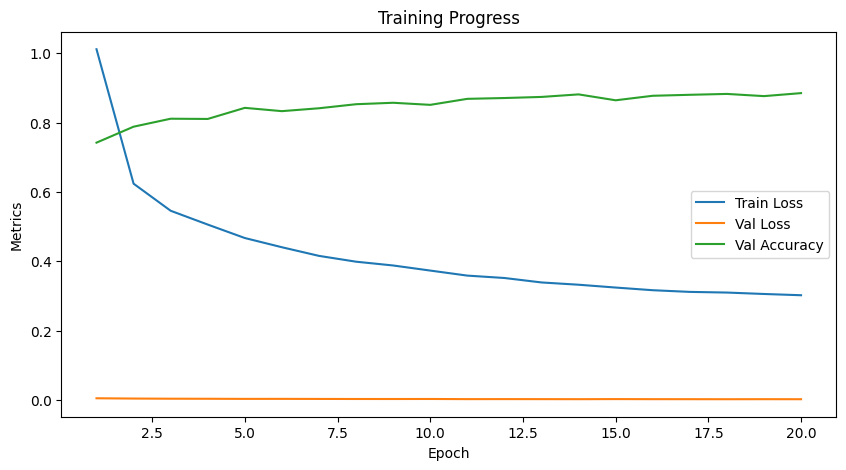

Testing [Test]: 100%|██████████████████████████████████| 79/79 [00:01<00:00, 39.94it/s, test_acc=90, test_loss=0.00228]


In [3]:
import sys
sys.path.append('../tools')
from FashionMNIST import fashion_mnist_trainer
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

model = CNN(input_channels=1, output_size=10)
trainer = fashion_mnist_trainer(model=model, lr=0.01, batch_size=128, epoch=20, train_transforms=train_transforms, test_transforms=test_transforms)
trainer.train()
trainer.test()